# <center>Imported all necessary python library for further analysis.<center>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# <center>Reading csv fileby using read_csv() function and displaying the file information.<center>

In [28]:
data= pd.read_csv(r"C:\Users\kshit\Desktop\DataAnalysisProject\Project.csv")
print(data)

      age     sex     bmi  children smoker     region  medical charges
0      19  female  27.900         0    yes  southwest      16884.92400
1      18    male  33.770         1     no  southeast       1725.55230
2      28    male  33.000         3     no  southeast       4449.46200
3      33    male  22.705         0     no  northwest      21984.47061
4      32    male  28.880         0     no  northwest       3866.85520
...   ...     ...     ...       ...    ...        ...              ...
1333   50    male  30.970         3     no  northwest      10600.54830
1334   18  female  31.920         0     no  northeast       2205.98080
1335   18  female  36.850         0     no  southeast       1629.83350
1336   21  female  25.800         0     no  southwest       2007.94500
1337   61  female  29.070         0    yes  northwest      29141.36030

[1338 rows x 7 columns]


# <center>1. This will print the concise summary of the DataFrame, including the data types and non-null values for each column.
# 2. This will print the count of missing values in each column.<center>

In [31]:
print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              1338 non-null   int64  
 1   sex              1338 non-null   object 
 2   bmi              1338 non-null   float64
 3   children         1338 non-null   int64  
 4   smoker           1338 non-null   object 
 5   region           1338 non-null   object 
 6   medical charges  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
age                0
sex                0
bmi                0
children           0
smoker             0
region             0
medical charges    0
dtype: int64


# <center>Finds the Maximum of BMI and Minimum of BMI.<center>

In [34]:
print(data['medical charges'].max())
print(data['medical charges'].min())

63770.42801
1121.8739


# <center>Finds the sum of Children and total count of Children.<center>

In [37]:
print(data['children'].sum())
print(data['children'].count())

1465
1338


# <center>Finds the Maximum age and Minimum age from csv file.<center>

In [40]:
print(data['age'].max())
print(data['age'].min())

64
18


# <center>Finds the Counts of Male and Female from sex cloumn in csv file.<center>

In [43]:
print(data['sex'].tolist().count('female'))
print(data['sex'].tolist().count('male'))

662
676


# <center>Calculate summary statistics for the relevant columns and Convert summary statistics to a DataFrame for better display.<center>

In [46]:
# Calculate summary statistics for the relevant columns
summary_stats = {
    'mean': data[['age', 'bmi', 'children', 'medical charges']].mean(),
    'median': data[['age', 'bmi', 'children', 'medical charges']].median(),
    'mode': data[['age', 'bmi', 'children', 'medical charges']].mode().iloc[0],
    'std': data[['age', 'bmi', 'children', 'medical charges']].std(),
    '25%': data[['age', 'bmi', 'children', 'medical charges']].quantile(0.25),
    '50%': data[['age', 'bmi', 'children', 'medical charges']].quantile(0.50),
    '75%': data[['age', 'bmi', 'children', 'medical charges']].quantile(0.75)
}

# Convert summary statistics to a DataFrame for better display
summary_stats_df = pd.DataFrame(summary_stats)

print(summary_stats_df)

                         mean    median       mode           std         25%  \
age                 39.207025    39.000    18.0000     14.049960    27.00000   
bmi                 30.663397    30.400    32.3000      6.098187    26.29625   
children             1.094918     1.000     0.0000      1.205493     0.00000   
medical charges  13270.422265  9382.033  1639.5631  12110.011237  4740.28715   

                      50%           75%  
age                39.000     51.000000  
bmi                30.400     34.693750  
children            1.000      2.000000  
medical charges  9382.033  16639.912515  


# <center>The logistic regression model was used to predict smoker status based on the features 'age', 'bmi', 'children', 'sex', and 'region'. The pipeline preprocesses the data by one-hot encoding categorical variables and standardizing numerical variables before fitting the logistic regression model.<center>

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# Preprocessing for Logistic Regression
X = data[['age', 'bmi', 'children', 'sex', 'region']]
y = data['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

# OneHotEncode categorical variables and standardize the numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), ['sex', 'region']),
        ('num', StandardScaler(), ['age', 'bmi', 'children'])
    ]
)

# Create a pipeline that preprocesses the data then applies Logistic Regression
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[214   0]
 [ 54   0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       214
           1       0.00      0.00      0.00        54

    accuracy                           0.80       268
   macro avg       0.40      0.50      0.44       268
weighted avg       0.64      0.80      0.71       268



# <center>Visualization<center> 

# <center> Observations:
<ol>
   <li> The highest frequency occurs in the 20-40 age range.</li>
    <li>There’s a decline in frequency beyond 40 years.</li>
    <li>The trend line indicate an overall aging population. </li>
</ol></center>on.

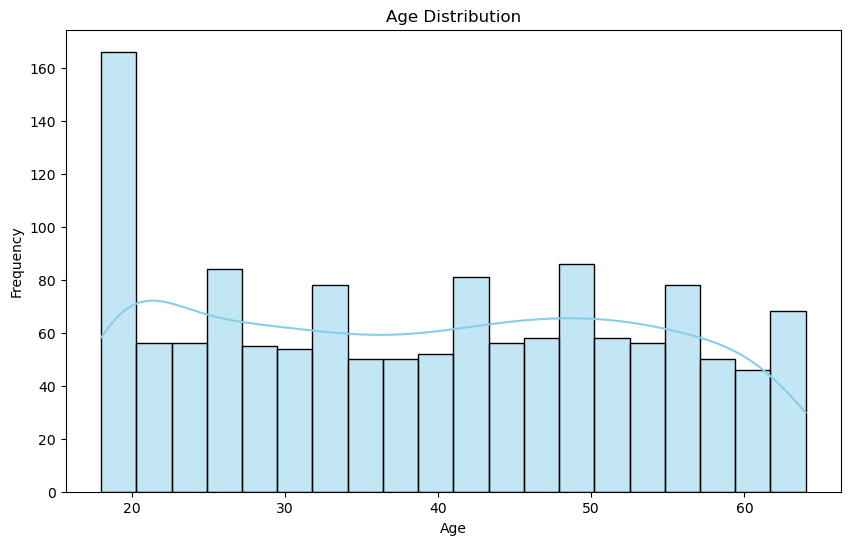

In [51]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# <center>Observations:
<ol>
    <li>
Most individuals in this sample have a BMI around 30.
This value is considered the threshold for obesity by many health organization
</li>
</ol>s.

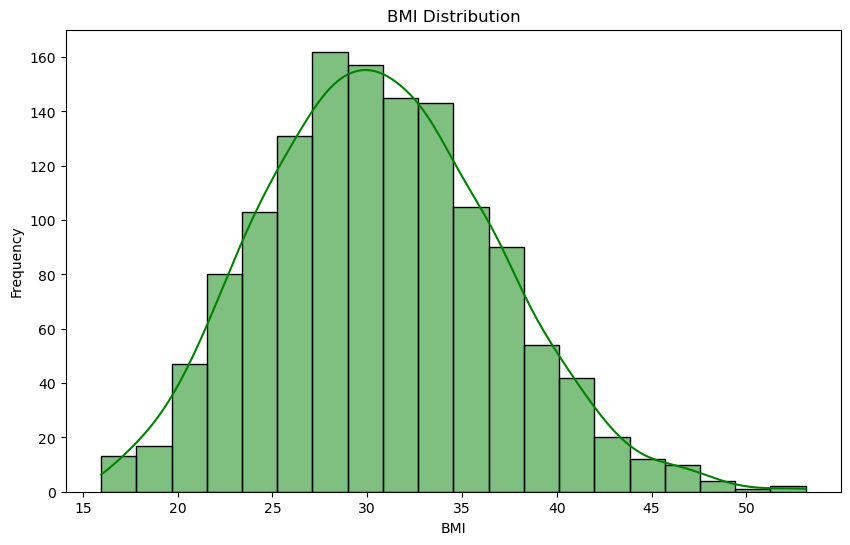

In [53]:
#BMI Distribution
plt.figure(figsize=(10,6))
sns.histplot(data['bmi'],bins=20, kde=True,color='green')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='sex', ylabel='count'>

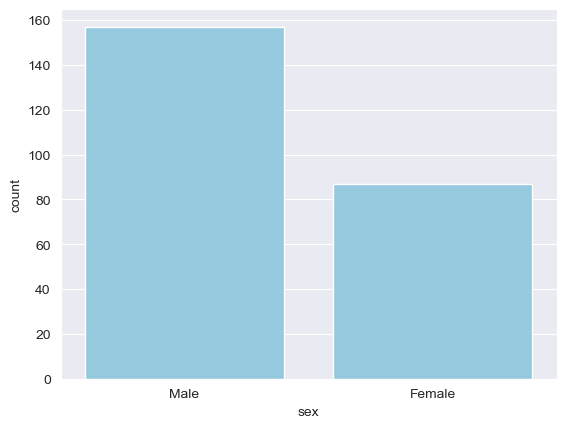

In [55]:
# load the tips dataset present by default in seaborn
tips = sns.load_dataset('tips') 
sns.set_style('darkgrid')
 
# make a countplot
sns.countplot(x ='sex', data = tips,color='skyblue') 

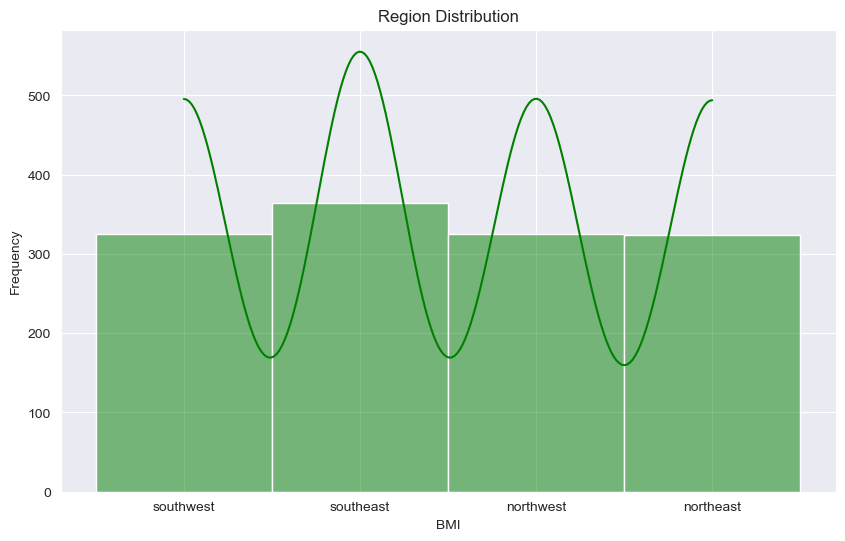

In [57]:
#region Distribution
plt.figure(figsize=(10,6))
sns.histplot(data['region'],bins=20, kde=True,color='green')
plt.title('Region Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

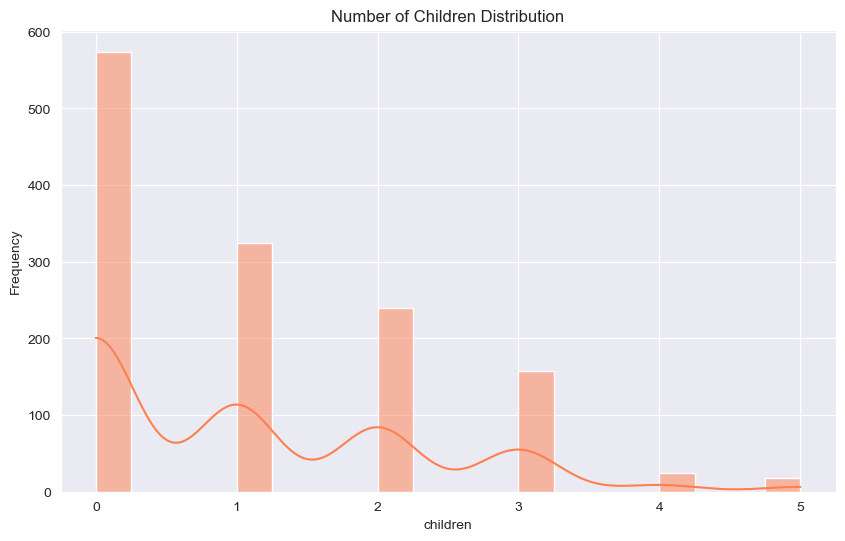

In [59]:
#region Distribution
plt.figure(figsize=(10,6))
sns.histplot(data['children'],bins=20, kde=True,color='coral')
plt.title('Number of Children Distribution')
plt.xlabel('children')
plt.ylabel('Frequency')
plt.show()

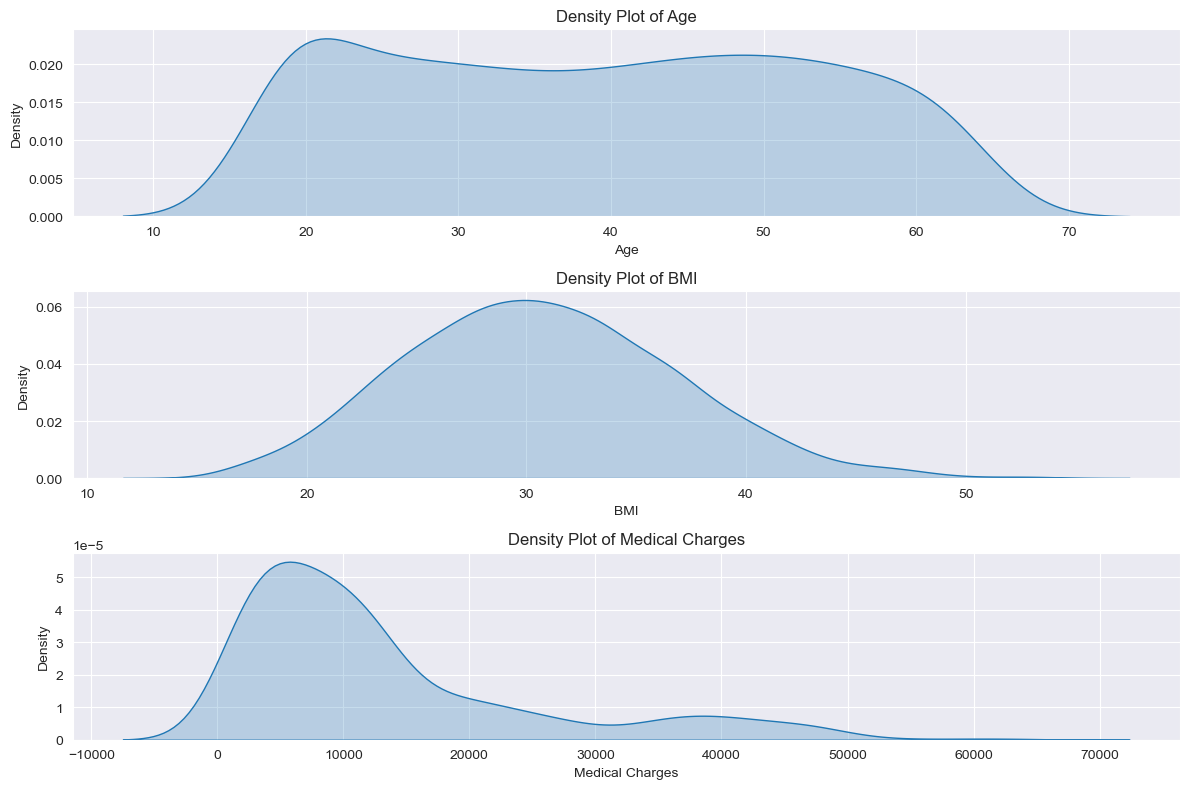

In [61]:
# Plot density plots
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
sns.kdeplot(data['age'], shade=True)
plt.title('Density Plot of Age')
plt.xlabel('Age')

plt.subplot(3, 1, 2)
sns.kdeplot(data['bmi'], shade=True)
plt.title('Density Plot of BMI')
plt.xlabel('BMI')

plt.subplot(3, 1, 3)
sns.kdeplot(data['medical charges'], shade=True)
plt.title('Density Plot of Medical Charges')
plt.xlabel('Medical Charges')

plt.tight_layout()
plt.show()

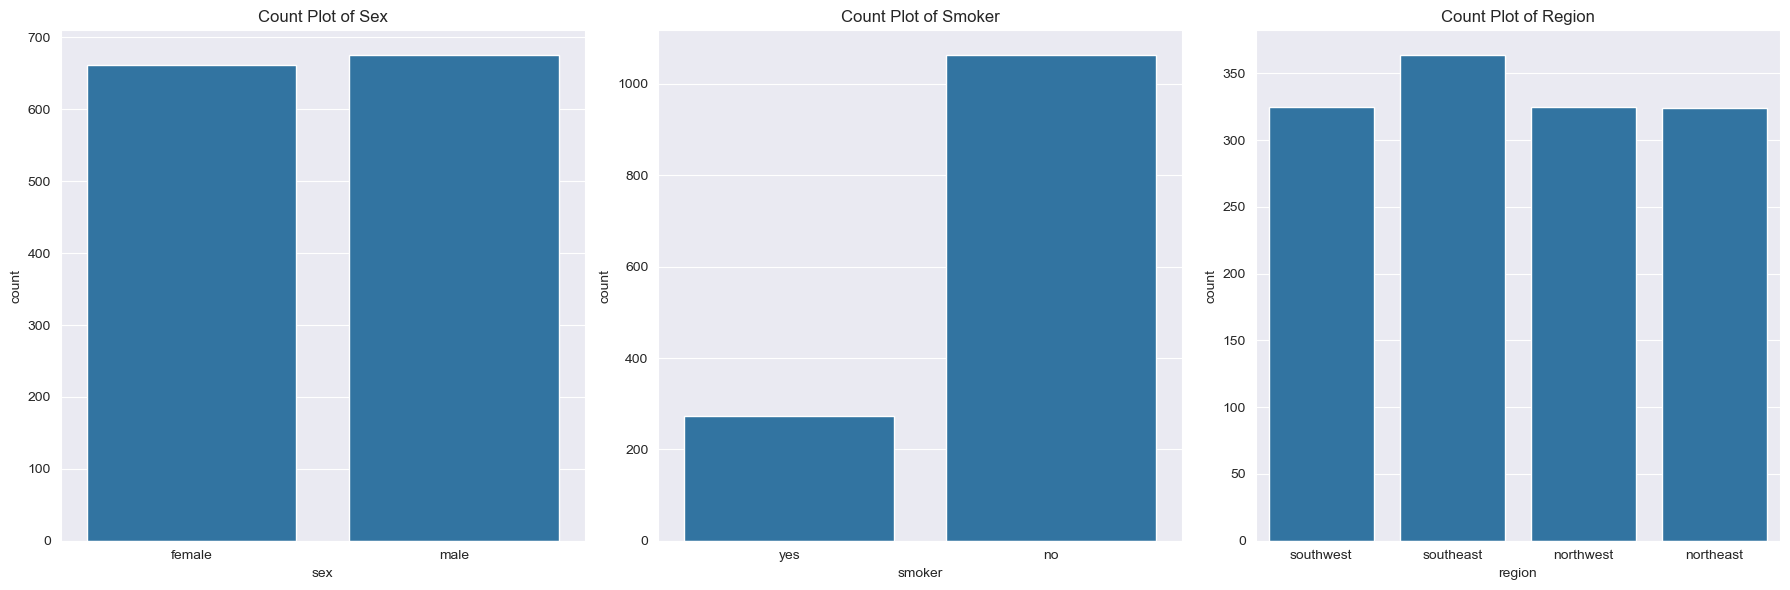

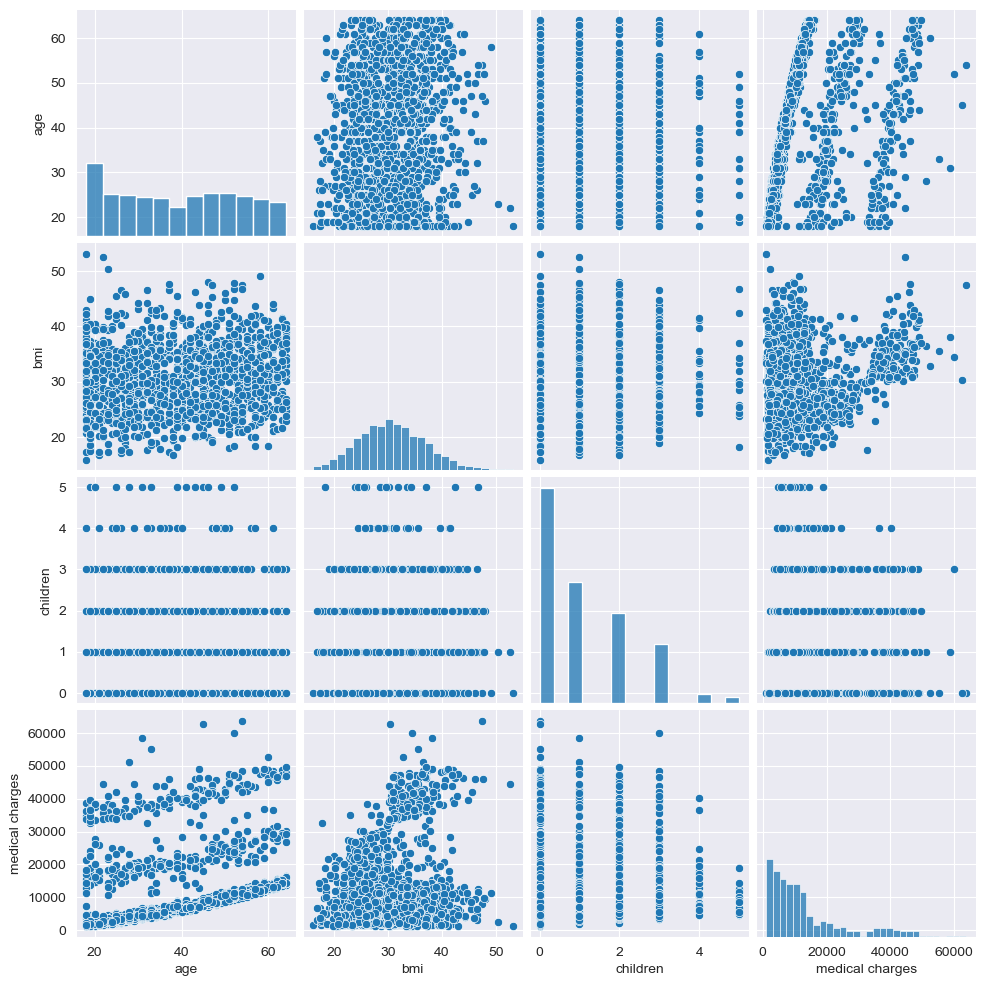

In [63]:
# Plot count plots for categorical variables
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.countplot(x='sex', data=data)
plt.title('Count Plot of Sex')

plt.subplot(1, 3, 2)
sns.countplot(x='smoker', data=data)
plt.title('Count Plot of Smoker')

plt.subplot(1, 3, 3)
sns.countplot(x='region', data=data)
plt.title('Count Plot of Region')

plt.tight_layout()
plt.show()

# Correlation matrix
correlation_matrix = data[['age', 'bmi', 'children', 'medical charges']].corr()

# Plotting the correlation matrix
#plt.figure(figsize=(10, 8))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
#plt.title('Correlation Matrix')
#plt.show()

# Pair plots
sns.pairplot(data[['age', 'bmi', 'children', 'medical charges']])
plt.show()

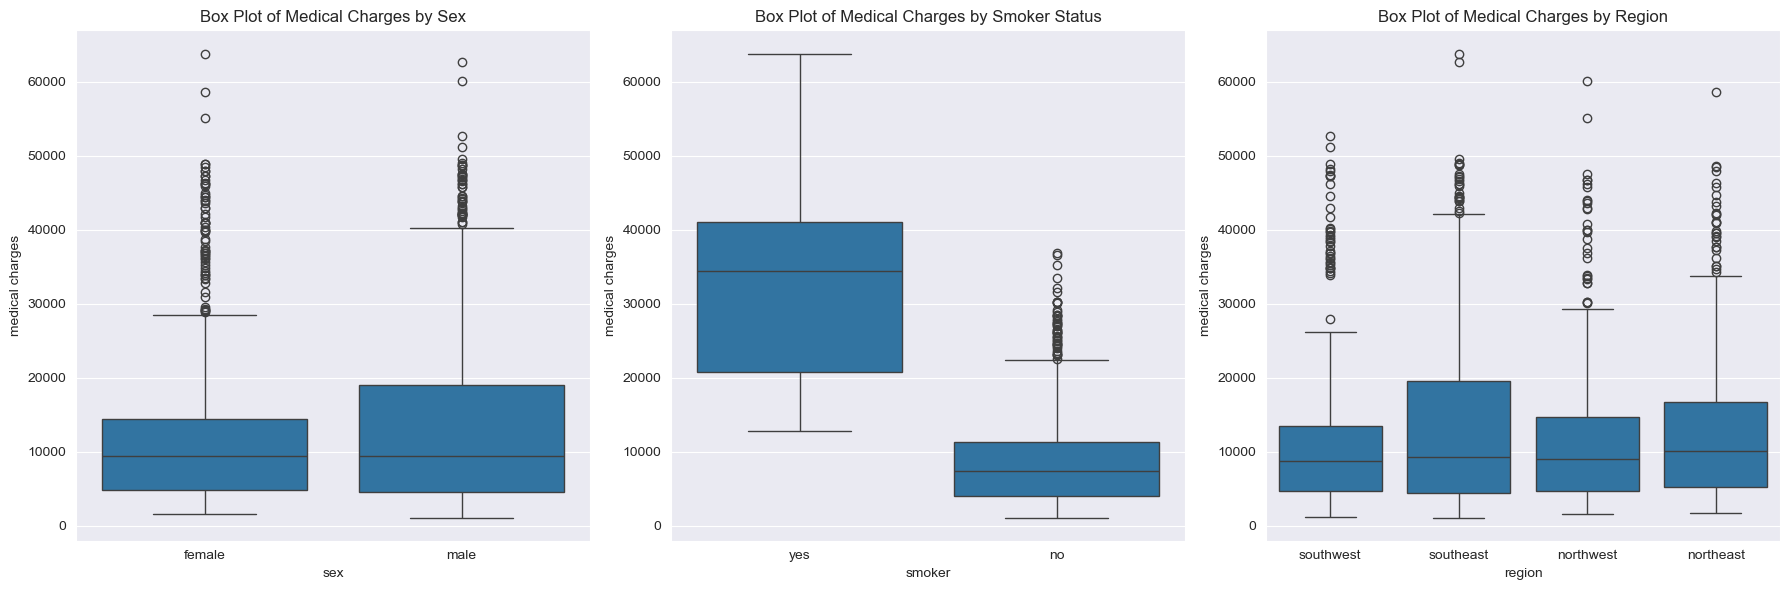

  smoker     region medical charges              
                               mean        median
0     no  northeast     9165.531672   8342.908750
1     no  northwest     8556.463715   7256.723100
2     no  southeast     8032.216309   6652.528800
3     no  southwest     8019.284513   7348.142000
4    yes  northeast    29673.536473  28101.333050
5    yes  northwest    30192.003182  27488.996475
6    yes  southeast    34844.996824  37484.449300
7    yes  southwest    32269.063494  35165.256500


In [64]:
# Box plots
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='sex', y='medical charges', data=data)
plt.title('Box Plot of Medical Charges by Sex')

plt.subplot(1, 3, 2)
sns.boxplot(x='smoker', y='medical charges', data=data)
plt.title('Box Plot of Medical Charges by Smoker Status')

plt.subplot(1, 3, 3)
sns.boxplot(x='region', y='medical charges', data=data)
plt.title('Box Plot of Medical Charges by Region')

plt.tight_layout()
plt.show()

# Group analysis: mean and median medical charges
group_analysis = data.groupby(['smoker', 'region']).agg({
    'medical charges': ['mean', 'median']
}).reset_index()

# Display the group analysis result
print(group_analysis)

Mean Squared Error: 33596915.851361506
R^2 Score: 0.7835929767120721


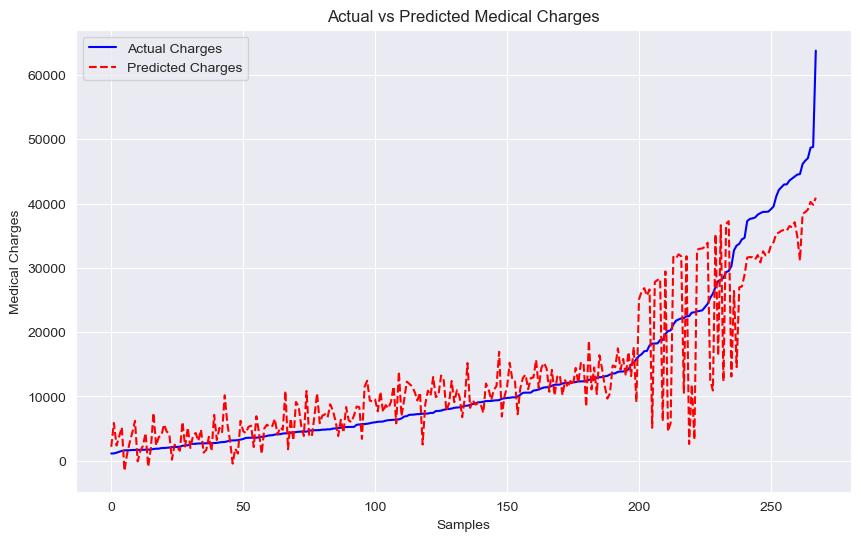

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score


# Preprocessing for Linear Regression
X = data[['age', 'bmi', 'children', 'sex', 'smoker', 'region']]
y = data['medical charges']

# OneHotEncode categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), ['sex', 'smoker', 'region'])
    ],
    remainder='passthrough'
)

# Create a pipeline that preprocesses the data then applies Linear Regression
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Sort the actual and predicted values for line plot
sorted_indices = y_test.argsort()
y_test_sorted = y_test.iloc[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plotting the actual vs predicted charges using a line chart
plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted.values, label='Actual Charges', color='blue')
plt.plot(y_pred_sorted, label='Predicted Charges', color='red', linestyle='--')
plt.xlabel('Samples')
plt.ylabel('Medical Charges')
plt.title('Actual vs Predicted Medical Charges')
plt.legend()
plt.show()


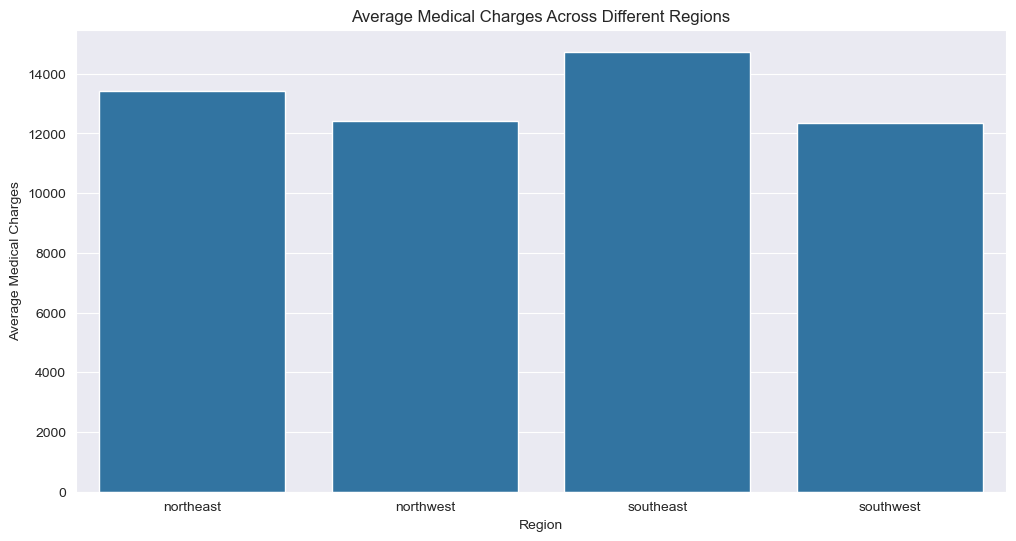

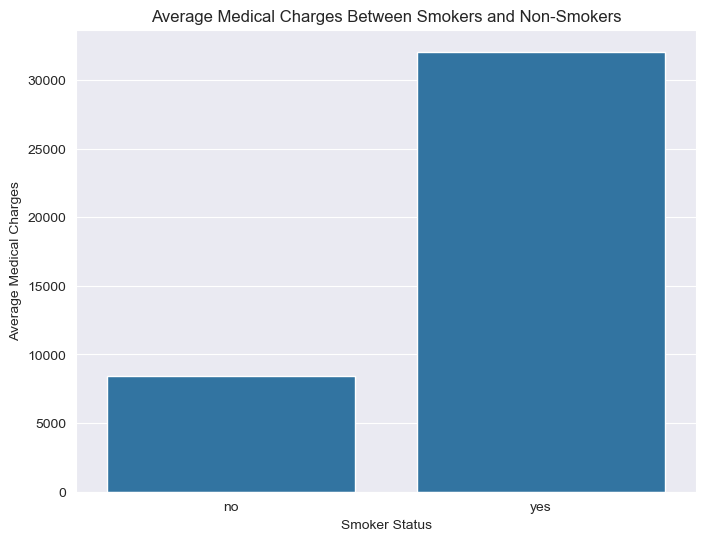

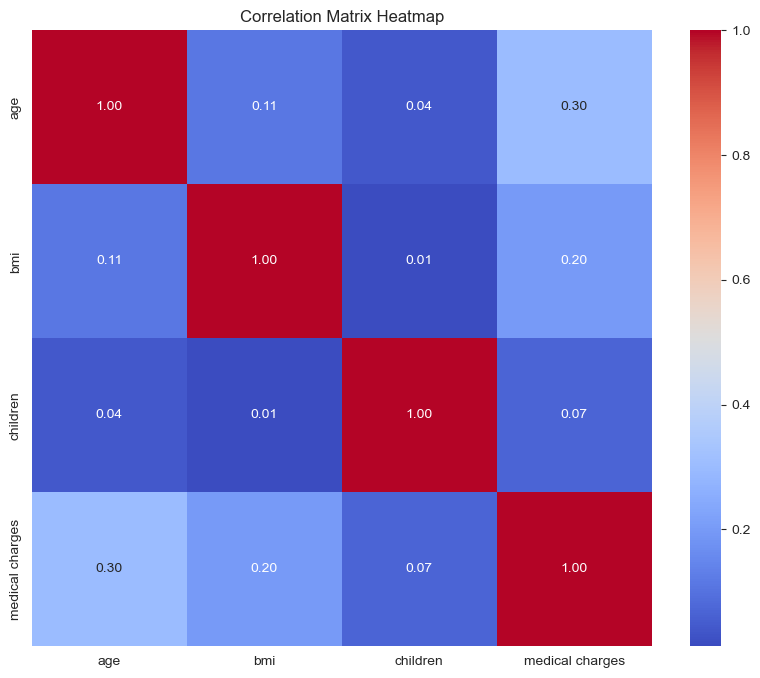

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart for average medical charges across different regions
plt.figure(figsize=(12, 6))
region_avg_charges = data.groupby('region')['medical charges'].mean().reset_index()
sns.barplot(x='region', y='medical charges', data=region_avg_charges)
plt.title('Average Medical Charges Across Different Regions')
plt.xlabel('Region')
plt.ylabel('Average Medical Charges')
plt.show()

# Bar chart for average medical charges between smokers and non-smokers
plt.figure(figsize=(8, 6))
smoker_avg_charges = data.groupby('smoker')['medical charges'].mean().reset_index()
sns.barplot(x='smoker', y='medical charges', data=smoker_avg_charges)
plt.title('Average Medical Charges Between Smokers and Non-Smokers')
plt.xlabel('Smoker Status')
plt.ylabel('Average Medical Charges')
plt.show()

# Ensure only numerical variables are included in the correlation matrix
numerical_data = data[['age', 'bmi', 'children', 'medical charges']]

# Heatmap to visualize correlations
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()
